In [1]:

import numpy as np
from scipy import io

# Loading Data
!wget https://github.com/AmbarCRoAl/TREND-2020/blob/master/imagedata.mat?raw=true
!mv imagedata.mat\?raw\=true imagedata.mat
data = io.loadmat('imagedata.mat')

--2020-08-03 09:18:55--  https://github.com/AmbarCRoAl/TREND-2020/blob/master/imagedata.mat?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/AmbarCRoAl/TREND-2020/raw/master/imagedata.mat [following]
--2020-08-03 09:18:55--  https://github.com/AmbarCRoAl/TREND-2020/raw/master/imagedata.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AmbarCRoAl/TREND-2020/master/imagedata.mat [following]
--2020-08-03 09:18:56--  https://raw.githubusercontent.com/AmbarCRoAl/TREND-2020/master/imagedata.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting resp

In [3]:
images_arrays = data['images']
images_arrays[0][7]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   2,   6,   7,   4,   4,   3,   2,   0,   0,
          0,   0],
       [  0,   0,   1,   6,  11,  15,  27,  37,  19,  10,   5,   3,   0,
          0,   0],
       [  0,   1,   2,  17,  33,  66,  84, 106,  68,  39,  14,   4,   1,
          0,   0],
       [  0,   1,   7,  41, 116, 181, 263, 253, 190,  97,  28,  10,   4,
          1,   0],
       [  0,   7,  24,  69, 150, 328, 437, 431, 340, 144,  63,  22,   4,
          0,   0],
       [  0,   5,  23,  89, 178, 351, 486, 543, 346, 168,  97,  26,   1,
          0,   0],
       [  1,   3,  14,  66, 153, 329, 435, 414, 324, 189,  66,  14,  11,
          1,   0],
       [  0,   1,  12,  38, 114, 193, 237, 243, 184, 101,  24,  20,   3,
          4,   0],
       [  1,   1,   6,  21,  42,  78, 122, 108,  68,  40,  19,   4,   1,
       

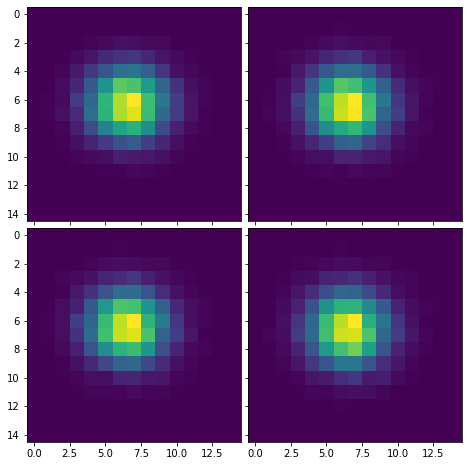

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

# Looking at the data

fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, images_arrays[0][0:4]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

## One array: multi-points prediction

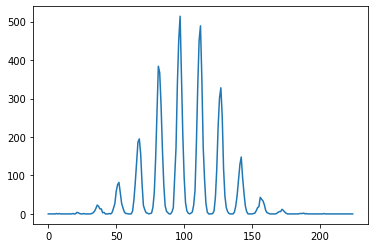

In [ ]:
# Formating data

# Adjusting the data, originally is grid and we want array
# Given alldata_array[0][i], i->253, i are the images(15x15) in each step of the turn
# Predictions will be made as if each pixel is an attribute 

def convert2D_to1D(data, pixels,steps):
  #data is an array of the form data[steps][pixels][pixels]
  array = np.zeros((steps,pixels**2), float)
  for i in range(steps):
    array[i] = data[i].reshape(pixels**2)                                                                                                                                                                                            
  return array

def convert1D_to2D(data, pixels, steps = False):
  # steps = True = data is an array of the form data[rows][pixels * pixels]
  if steps:
    array = np.zeros((data.shape[0],pixels,pixels), float)
    for i in range(data.shape[0]):
      array[i] = data[i].reshape(pixels,pixels)
    return array
  return data.reshape(pixels,pixels)


copy_data =  images_arrays[0]
pixels = 15
steps = 253
alldata_matrix = convert2D_to1D(copy_data, pixels, steps)

plt.plot(alldata_matrix[0])

In [ ]:
# Functions to prepare the data

# Convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  if type(data) is list:  
	  n_vars = 1 ; 
  else:
    n_vars = data.shape[1]
  print(n_vars)
  df = DataFrame(data)
  cols, names = list(), list()
	# Input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
  # Forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
      names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
      names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# Put it all together
  agg = concat(cols, axis=1)
  agg.columns = names
	# Drop rows with NaN values
  if dropnan:
    agg.dropna(inplace=True)
  return agg


In [ ]:

# Prepare data for LSTM

import pandas as pd
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(alldata_matrix)

input, predict = 3, 3 
supervised_data = series_to_supervised(scaled,input, predict)
 
supervised_data.head


225


<bound method NDFrame.head of      var1(t-3)  var2(t-3)  var3(t-3)  ...  var223(t+2)  var224(t+2)  var225(t+2)
3          0.0        0.0        0.0  ...          0.0          0.0          0.0
4          0.0        0.0        0.0  ...          0.0          0.0          0.0
5          0.0        0.0        0.0  ...          0.0          0.0          0.0
6          0.0        0.0        0.0  ...          0.0          0.0          0.0
7          0.0        0.0        0.0  ...          0.0          0.0          0.0
..         ...        ...        ...  ...          ...          ...          ...
246        0.0        0.0        0.0  ...          0.0          0.0          0.0
247        0.0        0.0        0.0  ...          0.0          0.0          0.0
248        0.0        0.0        0.0  ...          0.0          0.0          0.0
249        0.0        0.0        0.0  ...          0.0          0.0          0.0
250        0.0        0.0        0.0  ...          0.0          0.0          0.

In [ ]:

#Creating a model

from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# split into train and test sets
n_train = 195
attributes = pixels**2
train = supervised_data.iloc[:n_train,:]
test = supervised_data.iloc[n_train:,:]

# split into input and outputs
train_X, train_y = train.iloc[:, 0:input*attributes], train.iloc[:, -predict*attributes:]
test_X, test_y = test.iloc[:, 0:input*attributes], test.iloc[:, -predict*attributes:]

# transform from pandas to numpy array
train_X = train_X.to_numpy()
test_X = test_X.to_numpy()
train_y = train_y.to_numpy()
test_y = test_y.to_numpy()

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], input, attributes))
test_X = test_X.reshape((test_X.shape[0], input, attributes))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Using TensorFlow backend.


(195, 3, 225) (195, 675) (53, 3, 225) (53, 675)


Train on 195 samples, validate on 53 samples
Epoch 1/100
 - 1s - loss: 0.1443 - val_loss: 0.1298
Epoch 2/100
 - 0s - loss: 0.1096 - val_loss: 0.0881
Epoch 3/100
 - 0s - loss: 0.0764 - val_loss: 0.0695
Epoch 4/100
 - 0s - loss: 0.0666 - val_loss: 0.0666
Epoch 5/100
 - 0s - loss: 0.0645 - val_loss: 0.0651
Epoch 6/100
 - 0s - loss: 0.0610 - val_loss: 0.0602
Epoch 7/100
 - 0s - loss: 0.0546 - val_loss: 0.0552
Epoch 8/100
 - 0s - loss: 0.0496 - val_loss: 0.0530
Epoch 9/100
 - 0s - loss: 0.0475 - val_loss: 0.0519
Epoch 10/100
 - 0s - loss: 0.0463 - val_loss: 0.0514
Epoch 11/100
 - 0s - loss: 0.0457 - val_loss: 0.0510
Epoch 12/100
 - 0s - loss: 0.0453 - val_loss: 0.0509
Epoch 13/100
 - 0s - loss: 0.0449 - val_loss: 0.0507
Epoch 14/100
 - 0s - loss: 0.0446 - val_loss: 0.0506
Epoch 15/100
 - 0s - loss: 0.0444 - val_loss: 0.0504
Epoch 16/100
 - 0s - loss: 0.0441 - val_loss: 0.0504
Epoch 17/100
 - 0s - loss: 0.0439 - val_loss: 0.0503
Epoch 18/100
 - 0s - loss: 0.0438 - val_loss: 0.0503
Epoch 19/1

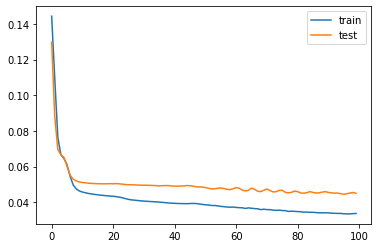

In [ ]:
import matplotlib.pyplot as pyplot

# design network
model = Sequential()
model.add(LSTM(25, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(input*attributes))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent

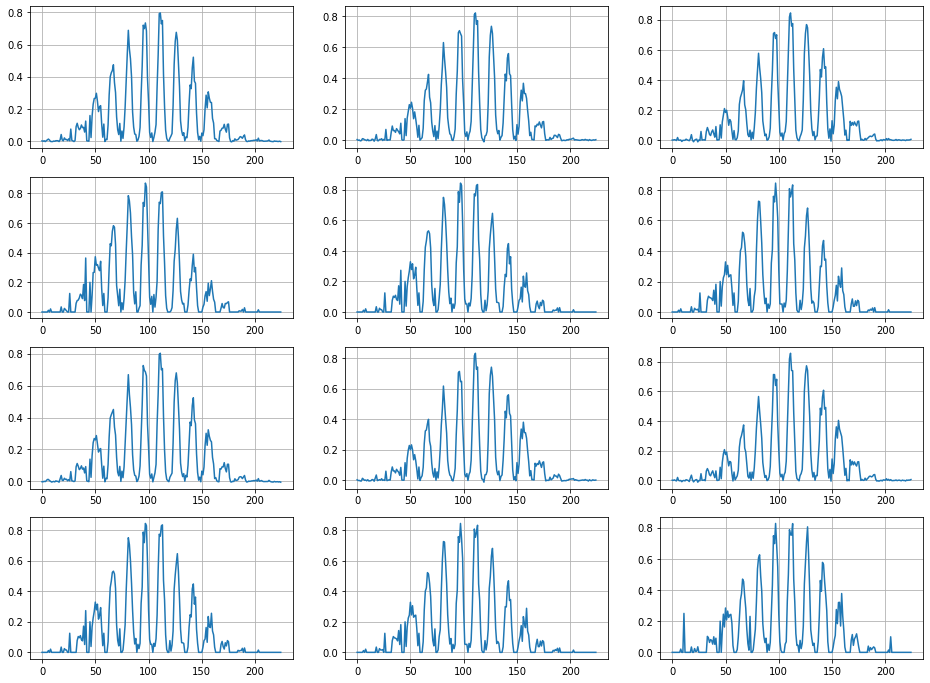

In [ ]:
# make a prediction
prediction = model.predict(test_X)

# prediction has shape (53, 675), for 53 steps 3 images predictions
# first we compare images in 1D, then 3D, and finally compare numerically

examples = np.zeros((4,3, pixels*pixels), float)
for i in range(3):
  start = i*(pixels**2)
  end = start + pixels**2
  examples[0][i] = prediction[0][start:end]

examples[1][0:3] = scaled[0:3]

for i in range(3):
  start = i*(pixels**2)
  end = start + pixels**2
  examples[2][i] = prediction[1][start:end]

examples[3][0:3] = scaled[1:4]

fig = plt.figure(figsize=(16., 12.))
index = 431
count = 1
for i in range(4):
  for j in range(3):
    if (count >= 10):
      plt.subplot(4, 3, int(count))
      plt.plot(examples[i][j])
      plt.grid(True)
      count+=1
    else:
      plt.subplot(int(index))
      plt.plot(examples[i][j])
      plt.grid(True)
      index+=1
      count+=1
      

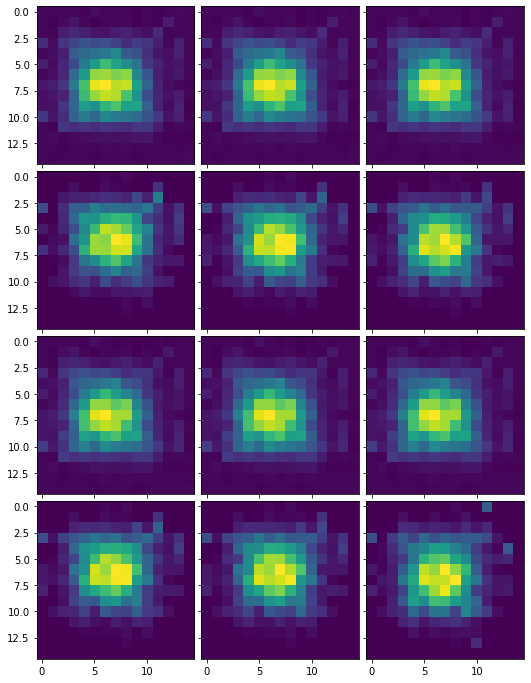

In [ ]:
# make a prediction
prediction = model.predict(test_X)

# prediction has shape (53, 675), for 53 steps 3 images predictions
# first we compare images in 1D, then 3D, and finally compare numerically

examples = np.zeros((12, pixels, pixels), float)
for i in range(3):
  start = i*(pixels**2)
  end = start + pixels**2
  examples[0:3] = convert1D_to2D(prediction[0][start:end], pixels)

examples[3:6] = convert1D_to2D(scaled[0:3], pixels, steps=True) 

for i in range(3):
  start = i*(pixels**2)
  end = start + pixels**2
  examples[6:9] = convert1D_to2D(prediction[1][start:end], pixels)


examples[9:12] = convert1D_to2D(scaled[1:4], pixels, steps=True) 

fig = plt.figure(figsize=(16., 12.))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 3), axes_pad=0.1)

for ax, im in zip(grid, examples):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()
      

"\nfor i in range(predict):\n  for j in range(prediction.shape[0]):\n      start = i*(pixels**2)\n      end = start + pixels**2\n      gif_array[i][j] = convert1D_to2D(prediction[j][start:end], pixels)\n      filename = 'imagen'+str(i)+'_'+str(j)+'.png'\n      for ax, im in zip(grid, gif_array[i][j:j+1]):\n          ax.imshow(im)\n      plt.savefig(filename)\n      files.download(filename)\n\n\n"

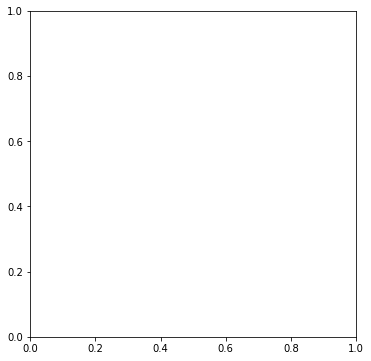

In [ ]:
# Saving images for the gif
from google.colab import files

fig = plt.figure(figsize=(6., 6.))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 1))
gif_array = np.zeros((predict, prediction.shape[0], pixels, pixels), float)

# files.download has a limit of 10 dowloads per run of a cell
# the code below has to be modified by hand to go 10 by 10
'''
for i in range(predict):
  for j in range(prediction.shape[0]):
      start = i*(pixels**2)
      end = start + pixels**2
      gif_array[i][j] = convert1D_to2D(prediction[j][start:end], pixels)
      filename = 'imagen'+str(i)+'_'+str(j)+'.png'
      for ax, im in zip(grid, gif_array[i][j:j+1]):
          ax.imshow(im)
      plt.savefig(filename)
      files.download(filename)


'''

"\nfor j in range(50,53):\n  filename = 'images_'+str(j)+'.png'\n  for ax, im in zip(grid, gif_array[j:j+1]):\n      ax.imshow(im)\n  plt.savefig(filename)\n  files.download(filename)\n"

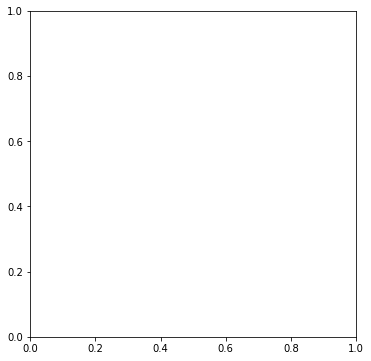

In [ ]:

gif_array = convert1D_to2D(scaled, pixels, True) 
fig = plt.figure(figsize=(6., 6.))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 1))

# files.download has a limit of 10 dowloads per run of a cell
# the code below has to be modified by hand to go 10 by 10
'''
for j in range(50,53):
  filename = 'images_'+str(j)+'.png'
  for ax, im in zip(grid, gif_array[j:j+1]):
      ax.imshow(im)
  plt.savefig(filename)
  files.download(filename)
'''

## Grid input: multi-step and multi-variate

In [ ]:
# This part was not finish

copy_data =  images_arrays
copy_data[0][0]

array([[  0,   0,   0,   0,   0,   0,   1,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   4,   3,   1,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   1,   3,   7,  14,  23,  20,  13,  13,   3,   4,   0,
          0,   0],
       [  1,   0,   4,  15,  27,  59,  76,  82,  55,  27,  15,   5,   1,
          1,   0],
       [  0,   0,   7,  36,  81, 134, 187, 195, 155,  79,  22,  11,   3,
          2,   0],
       [  1,   2,  17,  55, 144, 266, 384, 367, 282, 167,  76,  21,   7,
          3,   0],
       [  0,   5,  16,  92, 172, 337, 452, 514, 355, 205,  94,  29,   8,
          2,   0],
       [  2,   5,  23,  62, 184, 333, 451, 489, 353, 175,  90,  28,   5,
          0,   0],
       [  0,   1,   8,  44, 118, 228, 301, 328, 254, 117,  46,  16,   6,
          1,   0],
       [  0,   0,   5,  21,  49,  87, 128, 148,  95,  55,  21,   6,   0,
          0,   0],
       [  0,   1,   2,   8,  16,  19,  43,  38,  34,  24,   9,   3,   2,
       

In [ ]:
# Take 15 input and 15 attribute, predict 15 points and 15 attributes
# Must have run all previous cells
# We also change the scaling to -1->1 instead of 0->1; predicts one-one
copy_data =  images_arrays

# Prepare data for LSTM
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(copy_data)

input, predict = pixels, pixels
supervised_data = series_to_supervised(scaled[0][0],input, predict)
for i in range(steps-1):
  values = series_to_supervised(scaled[0][i+1],input, predict)
  supervised_data = supervised_data.append(values, ignore_index=True)
 
supervised_data.head


ValueError: ignored

In [ ]:
test_X[:,:,:].shape

(53, 3, 225)

In [ ]:
test_X[:,:,:].shape
test_X2=np.zeros((1,3,attributes))
test_X2[0,:,:] = test_X[0,:,:] # grab the first 3 input images into a new variable

iter_pred = 30 # number of feedbacks to do
y_pred_total = [] # predictions
y_real_total = [] # real values
for i in range(iter_pred):
  #print('running iter '+str(i))
  y_pred = model.predict(test_X2) # input first 3 images and predict

  # append prediction of 3 images to array
  y_pred_total.append(y_pred[0,0:attributes])
  y_pred_total.append(y_pred[0,attributes:attributes*2])
  y_pred_total.append(y_pred[0,attributes*2:attributes*3])

  # append the 3 real images to array
  y_real_total.append(test_X[i,0,:])
  y_real_total.append(test_X[i,1,:])
  y_real_total.append(test_X[i,2,:])

  # the 3 predictions are now set as the 3 inputs again
  test_X2[0,0,:] = (y_pred[0,0:attributes])
  test_X2[0,1,:] = y_pred[0,attributes:attributes*2]
  test_X2[0,2,:] = y_pred[0,attributes*2:attributes*3]

# lets make this into a numpy array
y_pred_total = np.array(y_pred_total)
y_real_total = np.array(y_real_total)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


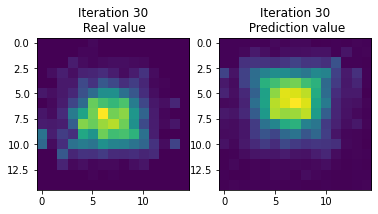

In [ ]:
from matplotlib import animation
from IPython.display import HTML, display

fig,ax = plt.subplots(1,2)

def updatefig(image_selected):
    # input is essentially the frame to plot, here frame for us is the same as the image index to select, e.g. image # 0,1,2,3,4,5,....
    image_pred = y_pred_total[image_selected]
    image_real = y_real_total[image_selected]

    # 2 subplots, in the first one we plot the real image, second one is the prediction image
    # you can change this to add more subplots, etc... if you wanted to plot 3 real and 3 predic
    plt.subplot(1,2,1)
    im = plt.imshow(convert1D_to2D(image_real,15),interpolation='nearest')
    plt.title('Iteration '+str(image_selected+1)+'\n Real value')
    plt.subplot(1,2,2)
    im = plt.imshow(convert1D_to2D(image_pred,15),interpolation='nearest')
    plt.title('Iteration '+str(image_selected+1)+'\n Prediction value')
    return plt.gcf(),

# you can look up FuncAnimation to see what the inputs odo
# frames is the total number of frames
# interval is the delay in ms for each frame
# updatefig is the function to call each frame
ani = animation.FuncAnimation(fig, updatefig, interval=250, frames=30, blit=True)

HTML(ani.to_html5_video()) # this is a jupyter notebook / collab function to make an animated gif from the matplotlib animation

